# Part 1: Scrape comments and posts from Reddit

### import libraries and setup reddit app from client interfaces

In [1]:
#import libraries and sensitive information
import praw
import pandas as pd
from datetime import datetime
from reddit_auth import client_id, client_secret, username, password

In [2]:
#setup reddit
reddit = praw.Reddit(
    user_agent = True,  client_id =client_id,
    client_secret = client_secret,
    username = username, password = password)

### Get {number of posts} from each {keyword}. In this notebook, 3 keywords 150 posts each

In [3]:
def fetch_reddit_posts(keyword, limit):
    """Fetch top relevant post URLs based on keyword and limit"""
    search_results = reddit.subreddit("all").search(keyword, sort="relevance", limit=limit)
    
    urls = [post.url for post in search_results]
    keywords = [keyword] * len(urls)  # Create an array with the keyword repeated
    
    return urls, keywords  # Returning both lists

# Storage for accumulating multiple searches
urls = []
keywords = []

# Main loop for user input
while True:
    keyword = input("\nEnter a keyword to search Reddit (or type 'exit' to stop): ").strip()
    
    if keyword.lower() == "exit":
        print("\nExiting program. Here are all the collected URLs and keywords:\n")
        print("URLs:", urls)
        print("Keywords:", keywords)
        break

    try:
        num_posts = int(input("Enter the number of top posts to fetch: ").strip())
    except ValueError:
        print("Please enter a valid number.")
        continue

    # Fetch and store results
    new_urls, new_keywords = fetch_reddit_posts(keyword, num_posts)

    urls.extend(new_urls)  # Append new URLs to the existing list
    keywords.extend(new_keywords)  # Append new keywords to the existing list

    # Display results after each search
    print("\nCurrent Collected Data:")
    print("URLs:", urls)
    print("Keywords:", keywords)


Current Collected Data:
URLs: ['https://www.reddit.com/r/HubermanLab/comments/184nx2d/thoughts_on_zyns_or_other_nicotine_pouches/', 'https://www.reddit.com/r/QuittingZyn/comments/1apgnn1/stop_using_zyn_or_any_snus_or_nicotine_pouches/', 'https://www.reddit.com/r/Nicotine/comments/1j85tgq/zyn_pouches/', 'https://www.reddit.com/r/QuittingZyn/comments/1kgqjjv/found_this_sub_while_trying_my_first_zyn_pouch_is/', 'https://www.reddit.com/r/QuittingZyn/comments/1j7u2bm/quit_zyns_and_went_back_to_vaping_never_going/', 'https://www.reddit.com/r/covidlonghaulers/comments/1iyjvqg/zyn_pouches_anyone/', 'https://www.reddit.com/r/karachi/comments/1jub9mi/how_have_nicotine_pouches_zyn_velo_impacted_your/', 'https://www.reddit.com/r/QuittingZyn/comments/1547o9d/how_many_zyns_dodid_you_consume_daily/', 'https://english.elpais.com/usa/2024-04-02/nicotine-wakes-you-up-how-zyn-pouches-became-the-us-extreme-rights-latest-obsession-with-regaining-lost-manhood.html', 'https://sfstandard.com/2024/09/04/zyn-b

### actual number of posts saved 

In [4]:
len(keywords)

319

In [5]:
len(urls)

319

### delete dupliucated links and media posts (images and videos). In this case, we only use posts with words only

In [6]:
seen = set()
unique_urls = []
unique_keywords = []

for url, keyword in zip(urls, keywords):
    if url.startswith("https://www.reddit.com/") and url not in seen:
        unique_urls.append(url)
        unique_keywords.append(keyword)  # Keep the corresponding keyword
        seen.add(url)

# Overwrite the original lists
urls = unique_urls
keywords = unique_keywords

# Output results
print("Unique URLs after filtering and removing duplicates:")
print(urls)
print("Length of URLs:", len(urls))  

print("\nKeywords aligned with unique URLs:")
print(keywords)
print("Length of Keywords:", len(keywords))

Unique URLs after filtering and removing duplicates:
['https://www.reddit.com/r/HubermanLab/comments/184nx2d/thoughts_on_zyns_or_other_nicotine_pouches/', 'https://www.reddit.com/r/QuittingZyn/comments/1apgnn1/stop_using_zyn_or_any_snus_or_nicotine_pouches/', 'https://www.reddit.com/r/Nicotine/comments/1j85tgq/zyn_pouches/', 'https://www.reddit.com/r/QuittingZyn/comments/1kgqjjv/found_this_sub_while_trying_my_first_zyn_pouch_is/', 'https://www.reddit.com/r/QuittingZyn/comments/1j7u2bm/quit_zyns_and_went_back_to_vaping_never_going/', 'https://www.reddit.com/r/covidlonghaulers/comments/1iyjvqg/zyn_pouches_anyone/', 'https://www.reddit.com/r/karachi/comments/1jub9mi/how_have_nicotine_pouches_zyn_velo_impacted_your/', 'https://www.reddit.com/r/QuittingZyn/comments/1547o9d/how_many_zyns_dodid_you_consume_daily/', 'https://www.reddit.com/r/NicotinePouch/comments/1jcp64k/how_did_zyn_take_over_the_nicotine_pouch_market/', 'https://www.reddit.com/r/wallstreetbets/comments/1hez6mp/wsj_young_wall

### Extract the posts

In [7]:
post_log = []

In [8]:
#fetch comments, posts, and replies
i = 0
while i < len(urls) - 1:
    post = reddit.submission(url = urls[i])
    post_log.append({
        "author": post.author,
        "time_posted": datetime.fromtimestamp(post.created_utc),
        "title": post.title,
        "post": post.selftext,
        "up-votes": post.score,
        "subreddit": post.subreddit,
        "number_of_comments": len(post.comments),
        "keyword": keywords[i],
        "post_number": i+1
    })
    print(f"post {i} extracted ")
    i = i+1

post 0 extracted 
post 1 extracted 
post 2 extracted 
post 3 extracted 
post 4 extracted 
post 5 extracted 
post 6 extracted 
post 7 extracted 
post 8 extracted 
post 9 extracted 
post 10 extracted 
post 11 extracted 
post 12 extracted 
post 13 extracted 
post 14 extracted 
post 15 extracted 
post 16 extracted 
post 17 extracted 
post 18 extracted 
post 19 extracted 
post 20 extracted 
post 21 extracted 
post 22 extracted 
post 23 extracted 
post 24 extracted 
post 25 extracted 
post 26 extracted 
post 27 extracted 
post 28 extracted 
post 29 extracted 
post 30 extracted 
post 31 extracted 
post 32 extracted 
post 33 extracted 
post 34 extracted 
post 35 extracted 
post 36 extracted 
post 37 extracted 
post 38 extracted 
post 39 extracted 
post 40 extracted 
post 41 extracted 
post 42 extracted 
post 43 extracted 
post 44 extracted 
post 45 extracted 
post 46 extracted 
post 47 extracted 
post 48 extracted 
post 49 extracted 
post 50 extracted 
post 51 extracted 
post 52 extracted 
pos

In [9]:
df = pd.DataFrame(post_log)
df

,author,time_posted,title,post,up-votes,subreddit,number_of_comments,keyword,post_number
0,Technical-Ad8558,2023-11-26 15:11:18,Thoughts on zyns or other nicotine pouches?,What do you guys think about zyns do you think...,56,HubermanLab,49,zyn pouches,1
1,Latter_Company_3357,2024-02-12 17:07:36,Stop using Zyn or any snus or nicotine pouches...,i just created a reddit account to write you t...,49,QuittingZyn,31,zyn pouches,2
2,Wh0_kn0ws-,2025-03-10 11:35:35,Zyn pouches.,Currently using 3mg Zyn pouches every few hour...,4,Nicotine,3,zyn pouches,3
3,Wilde_Cat,2025-05-06 23:22:18,Found this sub while trying my first Zyn pouch...,I have the 3’s and it feels… good and bad at t...,12,QuittingZyn,15,zyn pouches,4
4,Chemical_Raccoon_184,2025-03-10 01:36:33,Quit Zyns and went back to vaping — never goin...,I went from cigarettes to vaping. Then I switc...,5,QuittingZyn,10,zyn pouches,5
...,...,...,...,...,...,...,...,...,...
211,Direct-Detective2005,2025-01-24 16:17:27,3mg Zyn vs 9 mg Fre,Why does a 3mg zyn feel stronger to me than a ...,3,NicotinePouch,4,2one pouches,212
212,PrepperJack,2024-11-14 06:26:34,"Was able to put in my ALP order, but...","for some reason, they can't ship to Georgia? I...",4,NicotinePouch,5,2one pouches,213
213,MentalMarsupial24,2024-08-29 16:30:10,I need a new nic pouch recommendation.. prefer...,Daily drivers:\n- 6mg Zyn coffee\n- 7mg Velo d...,2,Nicotine,4,2one pouches,214
214,WoodenCondition8209,2024-08-31 22:44:59,Save money with the 2One 5ct packs,,1,2OneNicotinePouch,0,2one pouches,215


In [10]:
sum(df['number_of_comments'])

1902

### Extract the comments and replies

In [11]:
comment_datalog = []

In [12]:
print(len(urls))

217


In [13]:
i = 0
while i < len(urls) - 1:
    post = reddit.submission(url = urls[i])
    post.comments.replace_more(limit=None)
    for comment in post.comments:
        comment_datalog.append({
            "author": comment.author,
            "time_posted": datetime.fromtimestamp(comment.created_utc),
            "post": comment.body,
            "up-votes": comment.score,
            "comment": 1,
            "reply": 0,
            "keyword": keywords[i],
            "post_number": i+1
        })
        for reply in comment.replies:
            comment_datalog.append({
            "author": reply.author,
            "time_posted": datetime.fromtimestamp(reply.created_utc),
            "post": reply.body,
            "up-votes": reply.score,
            "comment": 0,
            "reply": 1,
            "keyword": keywords[i],
            "post_number": i+1
        })
    print(f"post {i} done.")
    i = i + 1   

post 0 done.
post 1 done.
post 2 done.
post 3 done.
post 4 done.
post 5 done.
post 6 done.
post 7 done.
post 8 done.
post 9 done.
post 10 done.
post 11 done.
post 12 done.
post 13 done.
post 14 done.
post 15 done.
post 16 done.
post 17 done.
post 18 done.
post 19 done.
post 20 done.
post 21 done.
post 22 done.
post 23 done.
post 24 done.
post 25 done.
post 26 done.
post 27 done.
post 28 done.
post 29 done.
post 30 done.
post 31 done.
post 32 done.
post 33 done.
post 34 done.
post 35 done.
post 36 done.
post 37 done.
post 38 done.
post 39 done.
post 40 done.
post 41 done.
post 42 done.
post 43 done.
post 44 done.
post 45 done.
post 46 done.
post 47 done.
post 48 done.
post 49 done.
post 50 done.
post 51 done.
post 52 done.
post 53 done.
post 54 done.
post 55 done.
post 56 done.
post 57 done.
post 58 done.
post 59 done.
post 60 done.
post 61 done.
post 62 done.
post 63 done.
post 64 done.
post 65 done.
post 66 done.
post 67 done.
post 68 done.
post 69 done.
post 70 done.
post 71 done.
po

In [14]:
print(reddit.auth.limits)

{'remaining': 492.0, 'reset_timestamp': 1749629981.6231804, 'used': 508}


In [15]:
df2 = pd.DataFrame(comment_datalog)
print(df2.shape)
df2

(3165, 8)


,author,time_posted,post,up-votes,comment,reply,keyword,post_number
0,ApprehensiveExit7,2023-11-26 16:05:41,Following due to my addiction to zyns.,61,1,0,zyn pouches,1
1,SuperBasedBoy,2023-11-26 16:21:22,I just quit today. Been on and off them for ab...,15,0,1,zyn pouches,1
2,None,2023-11-26 17:09:29,My two cents: I always end up getting hooked. ...,30,1,0,zyn pouches,1
3,ethanbg15,2023-11-27 16:25:08,"In addition, it appears that nicotine itself (...",4,0,1,zyn pouches,1
4,GoodTennis1821,2024-05-05 09:23:15,But then I get addicted to food or sugar. And ...,1,0,1,zyn pouches,1
...,...,...,...,...,...,...,...,...
3160,Threadeea,2025-04-30 17:02:03,"Little late to the party, but are they as roug...",1,0,1,2one pouches,214
3161,TryGroundbreaking875,2024-08-31 01:58:58,Try EGP nicotine pouches. Up to 20mg per pouch...,2,1,0,2one pouches,214
3162,Bitter_Pattern290,2024-09-09 09:27:27,"Try new product Miamisnus product, it's very g...",2,1,0,2one pouches,214
3163,Snubie1,2021-05-16 11:37:58,"NIIN, 2One, Fre, and the new NIC-S are basical...",4,1,0,2one pouches,216


In [18]:
df2 = df2.drop_duplicates(subset='post', keep='first')
print(df2.shape)

(3065, 8)


In [19]:
index = df2['post_number'].unique()

In [20]:
df = df[df['post_number'].isin(index)]

### Export into csv files

In [21]:
df.to_csv('reddit_post_log.csv', index=False)
df2.to_csv('reddit_comment_log.csv', index=False)

# Part 2 Analysis


## combine comments and posts together

In [22]:
### NEED TO BE IN PYTHON 3.9 ENV FOR spacy TO WORK!!!! 
 
 #Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
#import string
from nltk.stem.porter import PorterStemmer

In [24]:
import numpy as np
import pandas as pd

In [25]:
post_log = pd.read_csv("reddit_post_log.csv")
print(post_log.shape)
post_log.head()

(199, 9)


,author,time_posted,title,post,up-votes,subreddit,number_of_comments,keyword,post_number
0,Technical-Ad8558,2023-11-26 15:11:18,Thoughts on zyns or other nicotine pouches?,What do you guys think about zyns do you think...,56,HubermanLab,49,zyn pouches,1
1,Latter_Company_3357,2024-02-12 17:07:36,Stop using Zyn or any snus or nicotine pouches...,i just created a reddit account to write you t...,49,QuittingZyn,31,zyn pouches,2
2,Wh0_kn0ws-,2025-03-10 11:35:35,Zyn pouches.,Currently using 3mg Zyn pouches every few hour...,4,Nicotine,3,zyn pouches,3
3,Wilde_Cat,2025-05-06 23:22:18,Found this sub while trying my first Zyn pouch...,I have the 3’s and it feels… good and bad at t...,12,QuittingZyn,15,zyn pouches,4
4,Chemical_Raccoon_184,2025-03-10 01:36:33,Quit Zyns and went back to vaping — never goin...,I went from cigarettes to vaping. Then I switc...,5,QuittingZyn,10,zyn pouches,5


In [26]:
comment_log = pd.read_csv("reddit_comment_log.csv")
print(comment_log.shape)
comment_log.head()

(3065, 8)


,author,time_posted,post,up-votes,comment,reply,keyword,post_number
0,ApprehensiveExit7,2023-11-26 16:05:41,Following due to my addiction to zyns.,61,1,0,zyn pouches,1
1,SuperBasedBoy,2023-11-26 16:21:22,I just quit today. Been on and off them for ab...,15,0,1,zyn pouches,1
2,NaN,2023-11-26 17:09:29,My two cents: I always end up getting hooked. ...,30,1,0,zyn pouches,1
3,ethanbg15,2023-11-27 16:25:08,"In addition, it appears that nicotine itself (...",4,0,1,zyn pouches,1
4,GoodTennis1821,2024-05-05 09:23:15,But then I get addicted to food or sugar. And ...,1,0,1,zyn pouches,1


In [27]:
post_log['post'] = post_log['post'].fillna(post_log['title'])
post_log.head()

,author,time_posted,title,post,up-votes,subreddit,number_of_comments,keyword,post_number
0,Technical-Ad8558,2023-11-26 15:11:18,Thoughts on zyns or other nicotine pouches?,What do you guys think about zyns do you think...,56,HubermanLab,49,zyn pouches,1
1,Latter_Company_3357,2024-02-12 17:07:36,Stop using Zyn or any snus or nicotine pouches...,i just created a reddit account to write you t...,49,QuittingZyn,31,zyn pouches,2
2,Wh0_kn0ws-,2025-03-10 11:35:35,Zyn pouches.,Currently using 3mg Zyn pouches every few hour...,4,Nicotine,3,zyn pouches,3
3,Wilde_Cat,2025-05-06 23:22:18,Found this sub while trying my first Zyn pouch...,I have the 3’s and it feels… good and bad at t...,12,QuittingZyn,15,zyn pouches,4
4,Chemical_Raccoon_184,2025-03-10 01:36:33,Quit Zyns and went back to vaping — never goin...,I went from cigarettes to vaping. Then I switc...,5,QuittingZyn,10,zyn pouches,5


In [28]:
comment_log.rename(columns={'text': 'post'}, inplace=True)
comment_log.rename(columns={'Up-votes': 'up-votes'}, inplace=True)
comment_log.rename(columns={'Author': 'author'}, inplace=True)
comment_log.head()

,author,time_posted,post,up-votes,comment,reply,keyword,post_number
0,ApprehensiveExit7,2023-11-26 16:05:41,Following due to my addiction to zyns.,61,1,0,zyn pouches,1
1,SuperBasedBoy,2023-11-26 16:21:22,I just quit today. Been on and off them for ab...,15,0,1,zyn pouches,1
2,NaN,2023-11-26 17:09:29,My two cents: I always end up getting hooked. ...,30,1,0,zyn pouches,1
3,ethanbg15,2023-11-27 16:25:08,"In addition, it appears that nicotine itself (...",4,0,1,zyn pouches,1
4,GoodTennis1821,2024-05-05 09:23:15,But then I get addicted to food or sugar. And ...,1,0,1,zyn pouches,1


In [29]:
common_columns = post_log.columns.intersection(comment_log.columns)
post_log_common = post_log[common_columns]
comment_log_common = comment_log[common_columns]
general_log = pd.concat([post_log_common, comment_log_common], ignore_index=True)
print(general_log.shape)
general_log

(3264, 6)


,author,time_posted,post,up-votes,keyword,post_number
0,Technical-Ad8558,2023-11-26 15:11:18,What do you guys think about zyns do you think...,56,zyn pouches,1
1,Latter_Company_3357,2024-02-12 17:07:36,i just created a reddit account to write you t...,49,zyn pouches,2
2,Wh0_kn0ws-,2025-03-10 11:35:35,Currently using 3mg Zyn pouches every few hour...,4,zyn pouches,3
3,Wilde_Cat,2025-05-06 23:22:18,I have the 3’s and it feels… good and bad at t...,12,zyn pouches,4
4,Chemical_Raccoon_184,2025-03-10 01:36:33,I went from cigarettes to vaping. Then I switc...,5,zyn pouches,5
...,...,...,...,...,...,...
3259,Threadeea,2025-04-30 17:02:03,"Little late to the party, but are they as roug...",1,2one pouches,214
3260,TryGroundbreaking875,2024-08-31 01:58:58,Try EGP nicotine pouches. Up to 20mg per pouch...,2,2one pouches,214
3261,Bitter_Pattern290,2024-09-09 09:27:27,"Try new product Miamisnus product, it's very g...",2,2one pouches,214
3262,Snubie1,2021-05-16 11:37:58,"NIIN, 2One, Fre, and the new NIC-S are basical...",4,2one pouches,216


# Analysis

 initial count of keywords

In [30]:
value_counts = general_log['keyword'].value_counts()
print(value_counts)

keyword
zyn pouches     2067
velo pouches    1167
2one pouches      30
Name: count, dtype: int64


## text cleaning and lemmatization/tokenization

In [32]:
general_log["post"] = general_log["post"].str.lower()
general_log["post"] = general_log["post"].replace(r'\?', '.', regex=True)
general_log.head()

,author,time_posted,post,up-votes,keyword,post_number
0,Technical-Ad8558,2023-11-26 15:11:18,what do you guys think about zyns do you think...,56,zyn pouches,1
1,Latter_Company_3357,2024-02-12 17:07:36,i just created a reddit account to write you t...,49,zyn pouches,2
2,Wh0_kn0ws-,2025-03-10 11:35:35,currently using 3mg zyn pouches every few hour...,4,zyn pouches,3
3,Wilde_Cat,2025-05-06 23:22:18,i have the 3’s and it feels… good and bad at t...,12,zyn pouches,4
4,Chemical_Raccoon_184,2025-03-10 01:36:33,i went from cigarettes to vaping. then i switc...,5,zyn pouches,5


In [33]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

In [34]:
import nltk
import ssl

'''
try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
'''
additional = ["nan", "else", "know", "take", "still", "seem", "mg", "go", "ago","maybe", "always", "put","thing","use","get","much", "www", "reddit", "moderator", "message", "https", "even", "lol", "com", "bot", "subreddit", "people", "delete", "sure", "really", "telegram", "askwoman", "comment","fuck","shit","literally","every_day","fucking","let","stuff","also", "com", "really", "https_www" ]
#nltk.download('stopwords')
stop_words = stopwords.words('english') + additional

In [35]:
def remove_stopwords(texts):
    return [[word for word in doc if word not in stop_words] for doc in texts]

In [36]:
import spacy
nlp = spacy.load('en_core_web_sm')
def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [37]:
def tokenize_lemmatization (text):
    data_words = list(sent_to_words(text))
    remove_stopwords_words = remove_stopwords(data_words)
    print("done_tokneize")
    bigram = gensim.models.Phrases(remove_stopwords_words, min_count=30, threshold=10) # higher threshold fewer phrases.
    #trigram = gensim.models.Phrases(bigram[data_words], threshold=50) 
    bigram_mod = gensim.models.phrases.Phraser(bigram)
    #trigram_mod = gensim.models.phrases.Phraser(trigram)
    print("done_bigram")
    bigram_text = [bigram_mod[doc] for doc in remove_stopwords_words]
    
    
    data_lemmatized = lemmatization(bigram_text, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV','PROPN'])
    # remove stopwords again
    remove_stopwords_words = remove_stopwords(data_lemmatized)
    
    return remove_stopwords_words

In [38]:
general_log

,author,time_posted,post,up-votes,keyword,post_number
0,Technical-Ad8558,2023-11-26 15:11:18,what do you guys think about zyns do you think...,56,zyn pouches,1
1,Latter_Company_3357,2024-02-12 17:07:36,i just created a reddit account to write you t...,49,zyn pouches,2
2,Wh0_kn0ws-,2025-03-10 11:35:35,currently using 3mg zyn pouches every few hour...,4,zyn pouches,3
3,Wilde_Cat,2025-05-06 23:22:18,i have the 3’s and it feels… good and bad at t...,12,zyn pouches,4
4,Chemical_Raccoon_184,2025-03-10 01:36:33,i went from cigarettes to vaping. then i switc...,5,zyn pouches,5
...,...,...,...,...,...,...
3259,Threadeea,2025-04-30 17:02:03,"little late to the party, but are they as roug...",1,2one pouches,214
3260,TryGroundbreaking875,2024-08-31 01:58:58,try egp nicotine pouches. up to 20mg per pouch...,2,2one pouches,214
3261,Bitter_Pattern290,2024-09-09 09:27:27,"try new product miamisnus product, it's very g...",2,2one pouches,214
3262,Snubie1,2021-05-16 11:37:58,"niin, 2one, fre, and the new nic-s are basical...",4,2one pouches,216


In [39]:
selected_text = general_log["post"]
clean_text = tokenize_lemmatization(selected_text)
clean_text 

done_tokneize
done_bigram


[['guy',
  'think',
  'zyns',
  'think',
  'beneficial',
  'especially',
  'stress',
  'obviously',
  'nicotine',
  'harmful',
  'due',
  'addictive',
  'nature',
  'contain',
  'make',
  'harmful',
  'carcinogen',
  'endocrine',
  'disruptor',
  'well',
  'brand'],
 ['create',
  'account',
  'write',
  'listen',
  'university',
  'computer',
  'science',
  'student',
  'heavy',
  'lifting',
  'addict',
  'snus',
  'past',
  'year',
  'mostly',
  'white',
  'one',
  'pack',
  'day',
  'fine',
  'day',
  'gym',
  'suddenly',
  'brain',
  'feel',
  'collapse',
  'look',
  'place',
  'sit',
  'public',
  'afraid',
  'knock',
  'run',
  'gym',
  'never',
  'expereience',
  'healthy',
  'life',
  'never',
  'year',
  'old',
  'sit',
  'gym',
  'til',
  'well',
  'train',
  'idk',
  'normal',
  'drive',
  'home',
  'public',
  'transport',
  'wake',
  'next',
  'day',
  'drink',
  'coffe',
  'taking',
  'snus',
  'start',
  'bad',
  'belly',
  'extremly',
  'bloated',
  'feel',
  'cut',
  'a

## Sentiment Analysis

In [40]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [41]:
def sentiment_scores(sentence):
 
    # Create a SentimentIntensityAnalyzer object.
    sid_obj = SentimentIntensityAnalyzer()
 
    # polarity_scores method of SentimentIntensityAnalyzer
    # object gives a sentiment dictionary.
    # which contains pos, neg, neu, and compound scores.
    sentiment_dict = sid_obj.polarity_scores(sentence)
    compound = sentiment_dict['compound']
    neg = sentiment_dict['neg']
    pos = sentiment_dict['pos']
    neu = sentiment_dict['neu']
    
    return compound, neg, pos,neu

 positive when score >0.05 , neutral when score <0.05 and >-0.05 , negative when <-0.05

In [42]:
compounds = []
negs = []
pos_ = []
neus = []
i = 0
for i in range (len(selected_text)):
    if selected_text[i] is None or (isinstance(selected_text[i], float) and selected_text[i] != selected_text[i]):
        compounds.append(float('nan'))
        negs.append(float('nan'))
        pos_.append(float('nan'))
        neus.append(float('nan'))
    else:
        compound, neg, pos,neu  = sentiment_scores(selected_text[i])
        compounds.append(compound)
        negs.append(neg)
        pos_.append(pos)
        neus.append(neu)
        
general_log["compounds_score"] = compounds
general_log['pos_score'] = pos_
general_log['neu_score'] = neus
general_log['neg_score'] = negs
#categorize scores as neutral, positive, or negative
conditions = [
    (general_log['compounds_score'] <= -.05),
    (general_log['compounds_score'] > -.05) & (general_log['compounds_score'] < .05),
    (general_log['compounds_score'] >= .05)
]

values = ['negative', 'neutral', 'positive']

general_log['post_group'] = np.select(conditions, values)

general_log.head()

,author,time_posted,post,up-votes,keyword,post_number,compounds_score,pos_score,neu_score,neg_score,post_group
0,Technical-Ad8558,2023-11-26 15:11:18,what do you guys think about zyns do you think...,56,zyn pouches,1,-0.0230,0.035,0.929,0.036,neutral
1,Latter_Company_3357,2024-02-12 17:07:36,i just created a reddit account to write you t...,49,zyn pouches,2,-0.9760,0.085,0.801,0.114,negative
2,Wh0_kn0ws-,2025-03-10 11:35:35,currently using 3mg zyn pouches every few hour...,4,zyn pouches,3,-0.1154,0.031,0.932,0.037,negative
3,Wilde_Cat,2025-05-06 23:22:18,i have the 3’s and it feels… good and bad at t...,12,zyn pouches,4,-0.1531,0.158,0.652,0.190,negative
4,Chemical_Raccoon_184,2025-03-10 01:36:33,i went from cigarettes to vaping. then i switc...,5,zyn pouches,5,0.9705,0.118,0.853,0.028,positive


In [43]:
general_log

,author,time_posted,post,up-votes,keyword,post_number,compounds_score,pos_score,neu_score,neg_score,post_group
0,Technical-Ad8558,2023-11-26 15:11:18,what do you guys think about zyns do you think...,56,zyn pouches,1,-0.0230,0.035,0.929,0.036,neutral
1,Latter_Company_3357,2024-02-12 17:07:36,i just created a reddit account to write you t...,49,zyn pouches,2,-0.9760,0.085,0.801,0.114,negative
2,Wh0_kn0ws-,2025-03-10 11:35:35,currently using 3mg zyn pouches every few hour...,4,zyn pouches,3,-0.1154,0.031,0.932,0.037,negative
3,Wilde_Cat,2025-05-06 23:22:18,i have the 3’s and it feels… good and bad at t...,12,zyn pouches,4,-0.1531,0.158,0.652,0.190,negative
4,Chemical_Raccoon_184,2025-03-10 01:36:33,i went from cigarettes to vaping. then i switc...,5,zyn pouches,5,0.9705,0.118,0.853,0.028,positive
...,...,...,...,...,...,...,...,...,...,...,...
3259,Threadeea,2025-04-30 17:02:03,"little late to the party, but are they as roug...",1,2one pouches,214,0.2144,0.117,0.883,0.000,positive
3260,TryGroundbreaking875,2024-08-31 01:58:58,try egp nicotine pouches. up to 20mg per pouch...,2,2one pouches,214,0.0000,0.000,1.000,0.000,neutral
3261,Bitter_Pattern290,2024-09-09 09:27:27,"try new product miamisnus product, it's very g...",2,2one pouches,214,0.4927,0.285,0.715,0.000,positive
3262,Snubie1,2021-05-16 11:37:58,"niin, 2one, fre, and the new nic-s are basical...",4,2one pouches,216,0.0000,0.000,1.000,0.000,neutral


In [44]:
general_log.to_csv('reddit_combined_with_vader.csv', index=False)

In [45]:
general_log = pd.read_csv('reddit_combined_with_vader.csv')

In [46]:
#mean sentiment score
mean_sent = np.mean(general_log['compounds_score'])
print("Mean Sentiment Score is:", mean_sent)

#proportion neutral
prop_neut = len(general_log[general_log['post_group']=='neutral'])/len(general_log)
num_neut = len(general_log[general_log['post_group']=='neutral'])
print("Proportion neutral:", prop_neut)
print("Number neutral is:", num_neut )

#proportion positive
prop_pos =len(general_log[general_log['post_group']=='positive'])/len(general_log)
num_pos = len(general_log[general_log['post_group']=='positive']) 
print("Proportion positive:", prop_pos)
print("Number positive is:", num_pos)

#proportion negative
prop_neg =len(general_log[general_log['post_group']=='negative'])/len(general_log)
num_neg = len(general_log[general_log['post_group']=='negative'])
print("Proportion negative:", prop_neg)
print("Number negative is:",num_neg )
print(f"The sum of all posts n = {len(general_log)}")

Mean Sentiment Score is: 0.12841817346000614
Proportion neutral: 0.2763480392156863
Number neutral is: 902
Proportion positive: 0.46139705882352944
Number positive is: 1506
Proportion negative: 0.2619485294117647
Number negative is: 855
The sum of all posts n = 3264


### sentiment histogram 

proportion of three categories

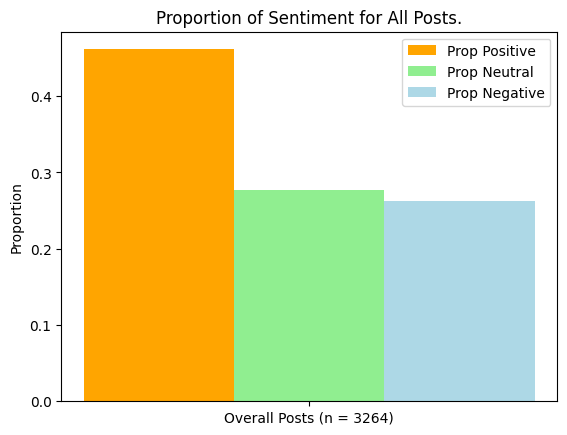

In [47]:
import numpy as np
import matplotlib.pyplot as plt
# Data for plotting
categories = [f"Overall Posts (n = {len(general_log)})"]
scores_1 = [prop_pos]
scores_2 = [prop_neut]
scores_3 = [prop_neg]

# Width of each bar
bar_width = 0.2

# Positions of the bars on the x-axis
bar_positions_1 = np.arange(len(categories))
bar_positions_2 = bar_positions_1 + bar_width
bar_positions_3 = bar_positions_2 + bar_width

# Create the bar chart
plt.bar(bar_positions_1, scores_1, width=bar_width, color='orange', label='Prop Positive')
plt.bar(bar_positions_2, scores_2, width=bar_width, color='lightgreen', label='Prop Neutral')
plt.bar(bar_positions_3, scores_3, width=bar_width, color='lightblue', label='Prop Negative')

# Set x-axis tick labels and title
plt.xticks(bar_positions_2, categories)
plt.ylabel('Proportion')
plt.title('Proportion of Sentiment for All Posts.')

# Add a legend
plt.legend()

# Display the plot
plt.show()

proportion of overall compound scores

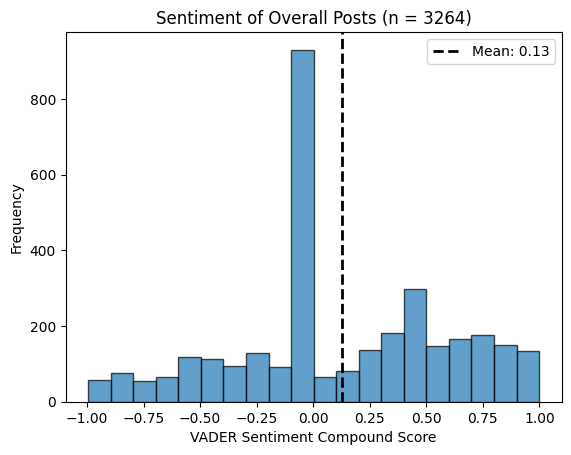

In [48]:
# Compute mean
compound = general_log["compounds_score"]
mean_score = np.mean(compound)

# Plot histogram
plt.hist(compound, bins=20, edgecolor='black', alpha=0.7)

# Add mean as a vertical black dashed line
plt.axvline(mean_score, color='black', linestyle='dashed', linewidth=2, label=f'Mean: {mean_score:.2f}')

# Labels and title
plt.xlabel('VADER Sentiment Compound Score')
plt.ylabel('Frequency')
plt.title(f'Sentiment of Overall Posts (n = {len(general_log)})')

# Show legend
plt.legend()

# Show plot
plt.show()

revisting the distribution

## LDA

In [49]:
clean_text

[['guy',
  'think',
  'zyns',
  'think',
  'beneficial',
  'especially',
  'stress',
  'obviously',
  'nicotine',
  'harmful',
  'due',
  'addictive',
  'nature',
  'contain',
  'make',
  'harmful',
  'carcinogen',
  'endocrine',
  'disruptor',
  'well',
  'brand'],
 ['create',
  'account',
  'write',
  'listen',
  'university',
  'computer',
  'science',
  'student',
  'heavy',
  'lifting',
  'addict',
  'snus',
  'past',
  'year',
  'mostly',
  'white',
  'one',
  'pack',
  'day',
  'fine',
  'day',
  'gym',
  'suddenly',
  'brain',
  'feel',
  'collapse',
  'look',
  'place',
  'sit',
  'public',
  'afraid',
  'knock',
  'run',
  'gym',
  'never',
  'expereience',
  'healthy',
  'life',
  'never',
  'year',
  'old',
  'sit',
  'gym',
  'til',
  'well',
  'train',
  'idk',
  'normal',
  'drive',
  'home',
  'public',
  'transport',
  'wake',
  'next',
  'day',
  'drink',
  'coffe',
  'taking',
  'snus',
  'start',
  'bad',
  'belly',
  'extremly',
  'bloated',
  'feel',
  'cut',
  'a

In [50]:
# Create Dictionary
id2word_train = corpora.Dictionary(clean_text)
id2word_train.filter_extremes(no_below=4, no_above=0.95)

# Create Corpus
texts_a = clean_text

# Term Document Frequency
corpus = [id2word_train.doc2bow(text) for text in texts_a]
print(f"Dictionary size: {len(id2word_train)}")
print(f"Corpus size: {len(corpus)}")

Dictionary size: 1873
Corpus size: 3264


In [51]:
id2word_train.save("corpora")
id2word_train=corpora.Dictionary.load("corpora")

In [52]:
import time
# coherence value
start_time = time.time()
coherence_values = []
model_list = []
for num_topics in range(2, 14):
    model = gensim.models.ldamodel.LdaModel(corpus=corpus, num_topics=num_topics, id2word=id2word_train,chunksize=50,
                                           random_state=100)
    print("--- %s seconds ---" % (time.time() - start_time))
    model_list.append(model)
    coherencemodel = CoherenceModel(model=model, texts=texts_a, dictionary=id2word_train, coherence='c_v')
    coherence_values.append(coherencemodel.get_coherence())
    print(num_topics)

--- 0.3906071186065674 seconds ---
2
--- 5.75360631942749 seconds ---
3
--- 9.432952642440796 seconds ---
4
--- 13.01720929145813 seconds ---
5
--- 16.570763111114502 seconds ---
6
--- 20.115098476409912 seconds ---
7
--- 23.773911237716675 seconds ---
8
--- 27.597081422805786 seconds ---
9
--- 31.231970071792603 seconds ---
10
--- 34.985024213790894 seconds ---
11
--- 38.824957609176636 seconds ---
12
--- 42.709999799728394 seconds ---
13


In [53]:
coherence_values

[0.5223204286575729,
 0.43478619872509855,
 0.41270921656982895,
 0.3926797202350816,
 0.4278204895972839,
 0.4125678120241623,
 0.38009813295679684,
 0.40374441189724575,
 0.40722859749972,
 0.39071831019869413,
 0.3889845793006513,
 0.34218603467893716]

In [54]:
import pyLDAvis
import pyLDAvis.gensim_models # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [55]:
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(model_list[1], corpus, id2word_train)
pyLDAvis.display(vis)

              x         y  topics  cluster       Freq
topic                                                
0      0.149547  0.172434       1        1  42.435079
2     -0.236227  0.033571       2        1  31.520265
1      0.086680 -0.206005       3        1  26.044657


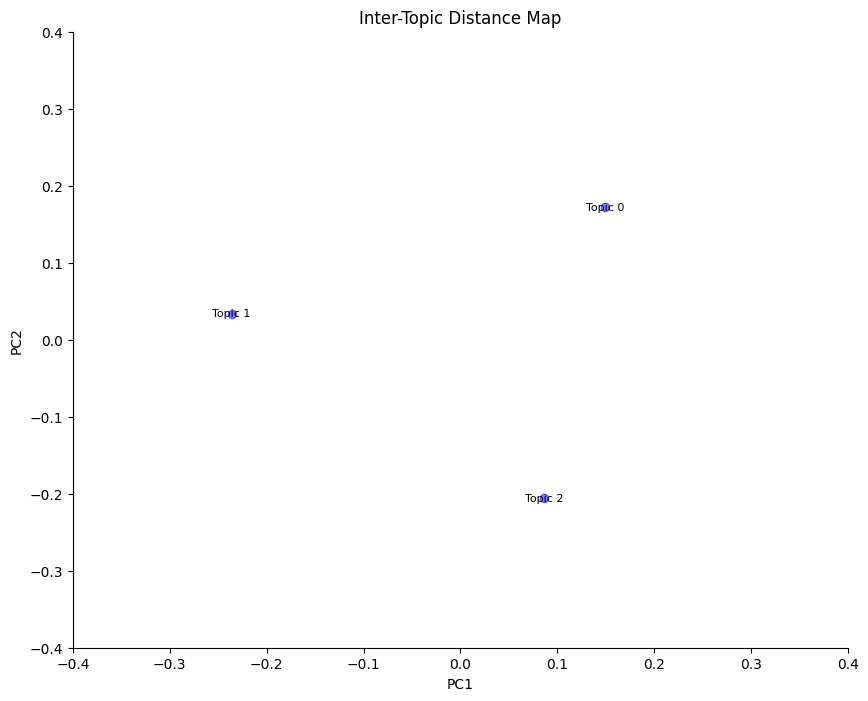

In [56]:
topic_coords = vis.topic_coordinates
print(topic_coords)
# Create scatter plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.scatter(topic_coords['x'], topic_coords['y'], c='b', alpha=0.5)
ax.set_xlim([-0.4, 0.4])  # Adjust x-axis limits
ax.set_ylim([-0.4, 0.4])  # Adjust y-axis limits
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Inter-Topic Distance Map')

# Add topic labels
for i, (x, y) in enumerate(zip(topic_coords['x'], topic_coords['y'])):
    ax.text(x, y, f'Topic {i}', fontsize=8, ha='center', va='center')

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

In [57]:
#Look at probabilities of top 20 words in each topic
model_list[1].print_topics(num_topics = 3, num_words = 20)

[(0,
  '0.036*"nicotine" + 0.031*"snus" + 0.022*"tobacco" + 0.015*"say" + 0.015*"product" + 0.013*"day" + 0.013*"thank" + 0.012*"smoke" + 0.012*"year" + 0.012*"vape" + 0.010*"cigarette" + 0.010*"pouch" + 0.009*"think" + 0.009*"time" + 0.009*"well" + 0.008*"work" + 0.008*"quit" + 0.007*"feel" + 0.007*"stop" + 0.007*"nic"'),
 (1,
  '0.017*"ship" + 0.016*"issue" + 0.012*"see" + 0.011*"make" + 0.010*"big" + 0.009*"company" + 0.009*"talk" + 0.008*"custom" + 0.008*"snusme" + 0.008*"find" + 0.007*"post" + 0.007*"red" + 0.007*"website" + 0.007*"general" + 0.007*"bad" + 0.007*"time" + 0.006*"bunch" + 0.006*"probably" + 0.006*"basically" + 0.006*"item"'),
 (2,
  '0.046*"order" + 0.023*"velo" + 0.021*"pouch" + 0.018*"good" + 0.017*"try" + 0.016*"brand" + 0.015*"zyn" + 0.012*"flavor" + 0.012*"list" + 0.012*"come" + 0.012*"place" + 0.012*"fda" + 0.011*"product" + 0.009*"buy" + 0.009*"shipping" + 0.009*"fre" + 0.009*"check" + 0.009*"ship" + 0.008*"see" + 0.007*"find"')]

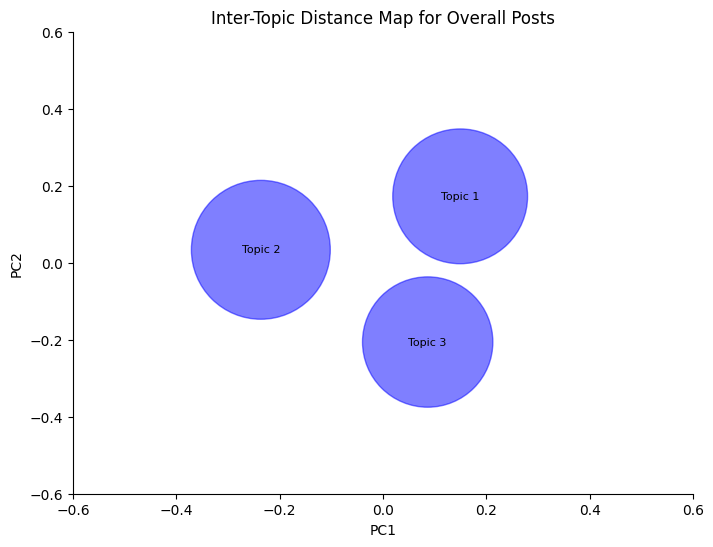

In [58]:
# Get topic coordinates and sizes
topic_coords = vis.topic_coordinates
topic_sizes = vis.topic_info['Freq']  # Assuming 'Freq' represents the sizes

# Normalize topic sizes
topic_sizes_norm = (topic_sizes - topic_sizes.min()) / (topic_sizes.max() - topic_sizes.min())

# Create scatter plot with zoom and adjusted sizes
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(topic_coords['x'], topic_coords['y'], c='b', alpha=0.5)  # Create scatter plot
ax.set_xlim([-0.6, 0.6])  # Adjust x-axis limits for zoom
ax.set_ylim([-0.6, 0.6])  # Adjust y-axis limits for zoom
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('Inter-Topic Distance Map for Overall Posts')

# Add topic labels
for i, (x, y) in enumerate(zip(topic_coords['x'], topic_coords['y'])):
    ax.text(x, y, f'Topic {i+1}', fontsize=8, ha='center', va='center')

# Adjust circle sizes
scatter.set_sizes(topic_sizes_norm * 10000)  # Adjust size scaling as needed

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Display the plot
plt.show()

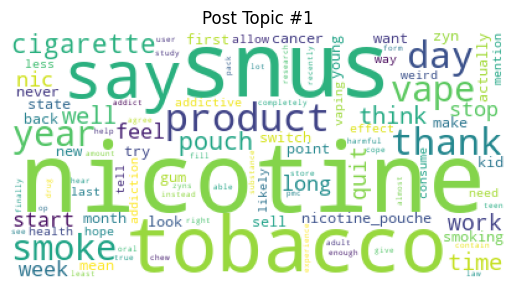

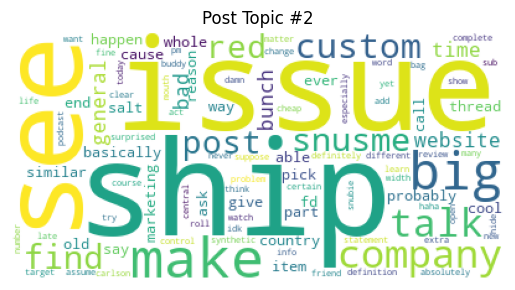

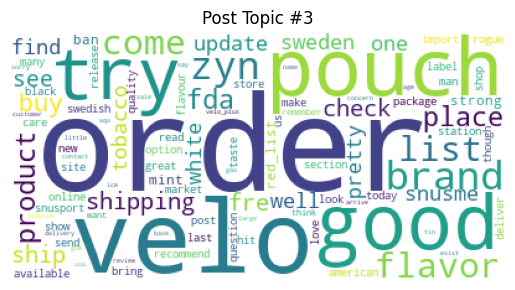

In [59]:
# create a word cloud for each topic where words that have higher probabilities are larger
from wordcloud import WordCloud


WordCloud = WordCloud(background_color="white",contour_width=3)
for t in range(model_list[1].num_topics):
    plt.figure()
    words =  model_list[1].show_topic(t, 100)
    words = dict((x,y) for x, y in words)
    plt.imshow(WordCloud.fit_words(words))
    plt.axis("off")
    plt.title("Post Topic #" + str(t+1))
    plt.show()

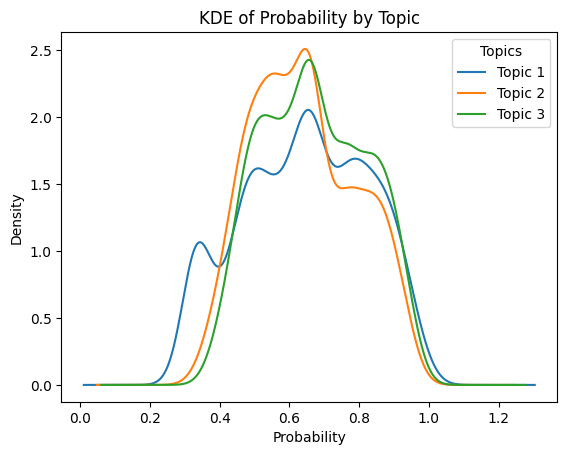

In [60]:
topics = []
prob = []

for d in clean_text:
    bow = id2word_train.doc2bow(d)
    probs = model_list[1].get_document_topics(bow)
    max_prob = max([set[1] for set in probs])
    prob.append(max_prob)
    topics.append([set[0] for set in probs if set[1] == max_prob])

# Truncate topics list if needed
topics = topics[:len(general_log)]

# Assign to DataFrame
general_log["topics"] = [t[0] if len(t) > 0 else None for t in topics]
general_log["prob"] = prob

# Plot KDE for each topic
for i in range(3):
    general_log[general_log["topics"] == i]["prob"].plot(kind='kde', label=f"Topic {i+1}")

# Add legend, labels, title
plt.legend(title="Topics")
plt.xlabel("Probability")
plt.ylabel("Density")
plt.title("KDE of Probability by Topic")

# Show plot
plt.show()

In [61]:
i = 0
while i < len(general_log):
    if general_log.at[i, "keyword"] == 'nicotine pouches' or general_log.at[i, "keyword"] == 'nic pouches' :
        post_text = general_log.at[i, 'post']
        if 'velo' in post_text:
            general_log.at[i, 'keyword'] = 'velo pouches'
        elif 'zyn' in post_text:
            general_log.at[i, 'keyword'] = 'zyn'
        elif 'fr3sh' in post_text:
            general_log.at[i, 'keyword'] = 'fr3sh pouches'
        elif 'niin' in post_text:
            general_log.at[i, 'keyword'] = 'niin pouches'
        elif 'on' in post_text:
            general_log.at[i, 'keyword'] = 'on! pouches'
        elif 'rogue' in post_text:
            general_log.at[i, 'keyword'] = 'rogue pouches'
        elif 'fre' in post_text:
            general_log.at[i, 'keyword'] = 'fre pouches'
    if general_log.at[i, "keyword"] == 'on pouches':
        general_log.at[i, 'keyword'] = 'on! pouches'
    if general_log.at[i, "keyword"] == 'nicotine pouches' or general_log.at[i, "keyword"] == 'nic pouches' :
        general_log.at[i, 'keyword'] = 'unspecified'
    i += 1


In [62]:
general_log

,author,time_posted,post,up-votes,keyword,post_number,compounds_score,pos_score,neu_score,neg_score,post_group,topics,prob
0,Technical-Ad8558,2023-11-26 15:11:18,what do you guys think about zyns do you think...,56,zyn pouches,1,-0.0230,0.035,0.929,0.036,neutral,0,0.887580
1,Latter_Company_3357,2024-02-12 17:07:36,i just created a reddit account to write you t...,49,zyn pouches,2,-0.9760,0.085,0.801,0.114,negative,1,0.541034
2,Wh0_kn0ws-,2025-03-10 11:35:35,currently using 3mg zyn pouches every few hour...,4,zyn pouches,3,-0.1154,0.031,0.932,0.037,negative,0,0.683592
3,Wilde_Cat,2025-05-06 23:22:18,i have the 3’s and it feels… good and bad at t...,12,zyn pouches,4,-0.1531,0.158,0.652,0.190,negative,0,0.478164
4,Chemical_Raccoon_184,2025-03-10 01:36:33,i went from cigarettes to vaping. then i switc...,5,zyn pouches,5,0.9705,0.118,0.853,0.028,positive,0,0.913029
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,Threadeea,2025-04-30 17:02:03,"little late to the party, but are they as roug...",1,2one pouches,214,0.2144,0.117,0.883,0.000,positive,1,0.553164
3260,TryGroundbreaking875,2024-08-31 01:58:58,try egp nicotine pouches. up to 20mg per pouch...,2,2one pouches,214,0.0000,0.000,1.000,0.000,neutral,2,0.815251
3261,Bitter_Pattern290,2024-09-09 09:27:27,"try new product miamisnus product, it's very g...",2,2one pouches,214,0.4927,0.285,0.715,0.000,positive,2,0.895741
3262,Snubie1,2021-05-16 11:37:58,"niin, 2one, fre, and the new nic-s are basical...",4,2one pouches,216,0.0000,0.000,1.000,0.000,neutral,0,0.477292


In [63]:
value_counts = general_log['keyword'].value_counts()
print(value_counts)

keyword
zyn pouches     2067
velo pouches    1167
2one pouches      30
Name: count, dtype: int64


## sentiment by LDA

In [64]:
#For easy understanding let's number the topics as 1,2,3 instead of 0,1,2
general_log['topic_final'] = general_log['topics']+1
print(general_log['topic_final'].value_counts())

#check that this worked
count_topic1 = pd.DataFrame(general_log['topic_final'].value_counts()).iloc[0][0]
count_topic2 = pd.DataFrame(general_log['topic_final'].value_counts()).iloc[2][0]
count_topic3 = pd.DataFrame(general_log['topic_final'].value_counts()).iloc[1][0]
#also check the propotion for each topic
print("Topic 1 count: n=", count_topic1, "prop = ", count_topic1/len(general_log))
print("Topic 2 count: n=", count_topic2, "prop = ", count_topic2/len(general_log))
print("Topic 3 count: n=", count_topic3, "prop = ", count_topic3/len(general_log))

topic_final
1    1302
3    1189
2     773
Name: count, dtype: int64
Topic 1 count: n= 1302 prop =  0.39889705882352944
Topic 2 count: n= 773 prop =  0.23682598039215685
Topic 3 count: n= 1189 prop =  0.3642769607843137


C:\Users\ericy\AppData\Local\Temp\ipykernel_24512\1765035868.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_topic1 = pd.DataFrame(general_log['topic_final'].value_counts()).iloc[0][0]
C:\Users\ericy\AppData\Local\Temp\ipykernel_24512\1765035868.py:7: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  count_topic2 = pd.DataFrame(general_log['topic_final'].value_counts()).iloc[2][0]
C:\Users\ericy\AppData\Local\Temp\ipykernel_24512\1765035868.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFra

In [65]:
#get just topic 1
topic1 = general_log[general_log['topic_final']==1]

#mean sentiment score
mean_sent1 = np.mean(topic1['compounds_score'])
print("Mean Sentiment Score is:", mean_sent1)

#proportion neutral
num_neut1 = len(topic1[topic1['post_group']=='neutral'])
prop_neut1 = len(topic1[topic1['post_group']=='neutral'])/len(topic1)
print("Proportion neutral:", prop_neut1, "n:", num_neut1)

#proportion positive
num_pos1 =len(topic1[topic1['post_group']=='positive'])
prop_pos1 =len(topic1[topic1['post_group']=='positive'])/len(topic1)
print("Proportion positive:", prop_pos1, "n:", num_pos1)

#proportion negative
num_neg1 =len(topic1[topic1['post_group']=='negative'])
prop_neg1 =len(topic1[topic1['post_group']=='negative'])/len(topic1)
print("Proportion negative:", prop_neg1, "n:", num_neg1)

Mean Sentiment Score is: 0.11168800922367411
Proportion neutral: 0.26574500768049153 n: 346
Proportion positive: 0.45314900153609833 n: 590
Proportion negative: 0.2803379416282642 n: 365


In [66]:
#get just topic 2
topic2 = general_log[general_log['topic_final']==2]

#mean sentiment score
mean_sent2 = np.mean(topic2['compounds_score'])
print("Mean Sentiment Score is:", mean_sent2)

#proportion neutral
num_neut2 = len(topic2[topic2['post_group']=='neutral'])
prop_neut2 = len(topic2[topic2['post_group']=='neutral'])/len(topic2)
print("Proportion neutral:", prop_neut2, "n:", num_neut2)

#proportion positive
num_pos2 =len(topic2[topic2['post_group']=='positive'])
prop_pos2 =len(topic2[topic2['post_group']=='positive'])/len(topic2)
print("Proportion positive:", prop_pos2, "n:", num_pos2)

#proportion negative
num_neg2 =len(topic2[topic2['post_group']=='negative'])
prop_neg2 =len(topic2[topic2['post_group']=='negative'])/len(topic2)
print("Proportion negative:", prop_neg2, "n:", num_neg2)

Mean Sentiment Score is: 0.04016222509702458
Proportion neutral: 0.2923673997412678 n: 226
Proportion positive: 0.39327296248382926 n: 304
Proportion negative: 0.314359637774903 n: 243


In [67]:
#get just topic 3
topic3 = general_log[general_log['topic_final']==3]

#mean sentiment score
mean_sent3 = np.mean(topic3['compounds_score'])
print("Mean Sentiment Score is:", mean_sent3)

#proportion neutral
num_neut3 = len(topic3[topic3['post_group']=='neutral'])
prop_neut3 = len(topic3[topic3['post_group']=='neutral'])/len(topic3)
print("Proportion neutral:", prop_neut3, "n:", num_neut3)

#proportion positive
num_pos3 =len(topic3[topic3['post_group']=='positive'])
prop_pos3 =len(topic3[topic3['post_group']=='positive'])/len(topic3)
print("Proportion positive:", prop_pos3, "n:", num_pos3)

#proportion negative
num_neg3 =len(topic3[topic3['post_group']=='negative'])
prop_neg3 =len(topic3[topic3['post_group']=='negative'])/len(topic3)
print("Proportion negative:", prop_neg3, "n:", num_neg3)

Mean Sentiment Score is: 0.2041017661900757
Proportion neutral: 0.27754415475189237 n: 330
Proportion positive: 0.5147182506307821 n: 612
Proportion negative: 0.2077375946173255 n: 247


In [68]:
general_log_topics_stat = pd.DataFrame(
    {'topic_number': [1, 2, 3],
        'mean_sent_score': [mean_sent1, mean_sent2, mean_sent3],
        'prop_neutral': [prop_neut1, prop_neut2, prop_neut3],
        'prop_positive': [prop_pos1, prop_pos2, prop_pos3],
        'prop_negative': [prop_neg1, prop_neg2, prop_neg3]}
)

general_log_topics_stat

,topic_number,mean_sent_score,prop_neutral,prop_positive,prop_negative
0,1,0.111688,0.265745,0.453149,0.280338
1,2,0.040162,0.292367,0.393273,0.314360
2,3,0.204102,0.277544,0.514718,0.207738


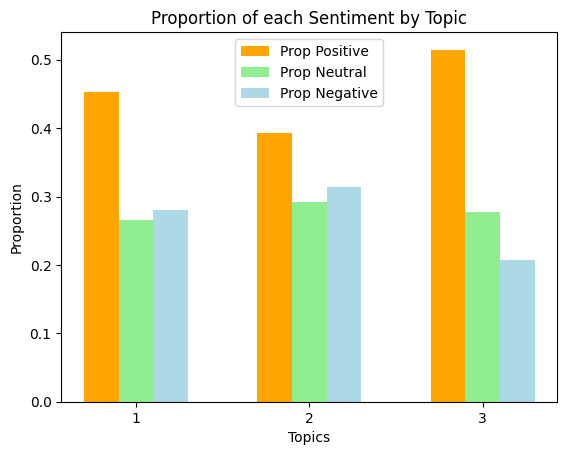

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Data for three categories and their scores
categories = general_log_topics_stat['topic_number']
scores_1 = [prop_pos1, prop_pos2, prop_pos3]
scores_2 = [prop_neut1, prop_neut2,prop_neut3]
scores_3 = [prop_neg1, prop_neg2,prop_neg3]

# Width of each bar
bar_width = 0.2

# Positions of the bars on the x-axis
bar_positions_1 = np.arange(len(categories))
bar_positions_2 = bar_positions_1 + bar_width
bar_positions_3 = bar_positions_2 + bar_width

# Create the bar chart
plt.bar(bar_positions_1, scores_1, width=bar_width, color='orange', label='Prop Positive')
plt.bar(bar_positions_2, scores_2, width=bar_width, color='lightgreen', label='Prop Neutral')
plt.bar(bar_positions_3, scores_3, width=bar_width, color='lightblue', label='Prop Negative')

# Set x-axis tick labels and title
plt.xticks(bar_positions_2, categories)
plt.xlabel('Topics')
plt.ylabel('Proportion')
plt.title('Proportion of each Sentiment by Topic')

# Add a legend
plt.legend()

# Display the plot
plt.show()

histogram of sentiment by topic

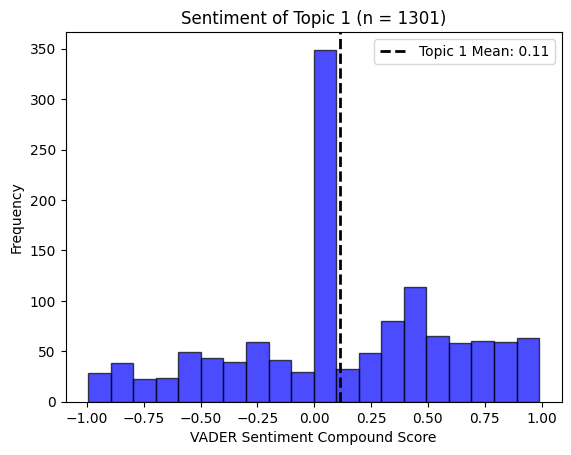

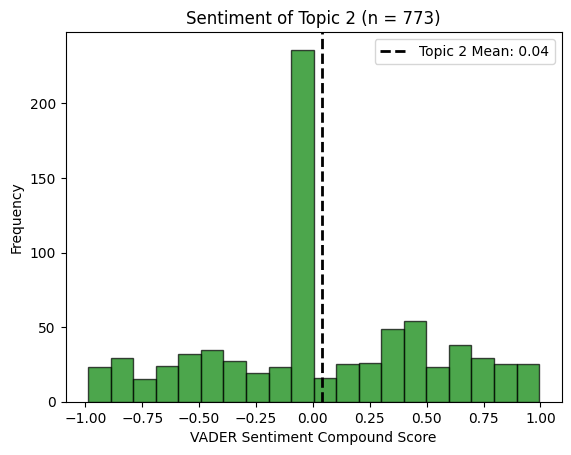

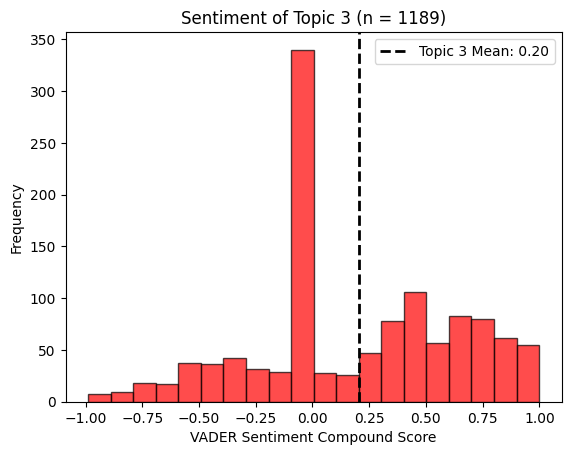

In [70]:
import matplotlib.pyplot as plt
import numpy as np

# Define colors for each topic
colors = ['blue', 'green', 'red']

# Loop through each topic (1, 2, 3)
for idx, topic in enumerate([1, 2, 3]):
    # Filter data for each topic
    compound_topic = general_log[general_log["topic_final"] == topic]["compounds_score"].dropna()
    
    # Compute mean sentiment score
    mean_score = np.mean(compound_topic)
    
    # Plot histogram with a different color for each topic
    plt.hist(compound_topic, bins=20, edgecolor='black', alpha=0.7, color=colors[idx])
    
    # Add mean as a vertical black dashed line
    plt.axvline(mean_score, color='black', linestyle='dashed', linewidth=2, label=f'Topic {topic} Mean: {mean_score:.2f}')
    
    # Labels and title
    plt.xlabel('VADER Sentiment Compound Score')
    plt.ylabel('Frequency')
    plt.title(f'Sentiment of Topic {topic} (n = {len(compound_topic)})')
    
    # Show legend
    plt.legend()

    # Show plot
    plt.show()


Statistics by Topic

In [71]:
general_log

,author,time_posted,post,up-votes,keyword,post_number,compounds_score,pos_score,neu_score,neg_score,post_group,topics,prob,topic_final
0,Technical-Ad8558,2023-11-26 15:11:18,what do you guys think about zyns do you think...,56,zyn pouches,1,-0.0230,0.035,0.929,0.036,neutral,0,0.887580,1
1,Latter_Company_3357,2024-02-12 17:07:36,i just created a reddit account to write you t...,49,zyn pouches,2,-0.9760,0.085,0.801,0.114,negative,1,0.541034,2
2,Wh0_kn0ws-,2025-03-10 11:35:35,currently using 3mg zyn pouches every few hour...,4,zyn pouches,3,-0.1154,0.031,0.932,0.037,negative,0,0.683592,1
3,Wilde_Cat,2025-05-06 23:22:18,i have the 3’s and it feels… good and bad at t...,12,zyn pouches,4,-0.1531,0.158,0.652,0.190,negative,0,0.478164,1
4,Chemical_Raccoon_184,2025-03-10 01:36:33,i went from cigarettes to vaping. then i switc...,5,zyn pouches,5,0.9705,0.118,0.853,0.028,positive,0,0.913029,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3259,Threadeea,2025-04-30 17:02:03,"little late to the party, but are they as roug...",1,2one pouches,214,0.2144,0.117,0.883,0.000,positive,1,0.553164,2
3260,TryGroundbreaking875,2024-08-31 01:58:58,try egp nicotine pouches. up to 20mg per pouch...,2,2one pouches,214,0.0000,0.000,1.000,0.000,neutral,2,0.815251,3
3261,Bitter_Pattern290,2024-09-09 09:27:27,"try new product miamisnus product, it's very g...",2,2one pouches,214,0.4927,0.285,0.715,0.000,positive,2,0.895741,3
3262,Snubie1,2021-05-16 11:37:58,"niin, 2one, fre, and the new nic-s are basical...",4,2one pouches,216,0.0000,0.000,1.000,0.000,neutral,0,0.477292,1


In [72]:
import pandas as pd
import numpy as np

def sentiment_stats_by_topic(data, topic_val):
    df = data[data["topic_final"] == topic_val]
    total = len(df)

    if total == 0:
        sentiment_result = {k: ("No data", 0, [None, None]) for k in ['negative', 'neutral', 'positive']}
        return 0, sentiment_result, ("No data", [None, None])

    # Sentiment distribution
    sentiment_result = {}
    for group in ["negative", "neutral", "positive"]:
        count = df[df["post_group"] == group].shape[0]
        p = count / total
        se = np.sqrt(p * (1 - p) / total)
        ci = [p - 1.96 * se, p + 1.96 * se]
        sentiment_result[group] = (count, round(p * 100, 2), [round(ci[0] * 100, 2), round(ci[1] * 100, 2)])

    # Compound score mean and 95% CI
    compound_scores = df["compounds_score"].dropna()
    n = len(compound_scores)
    if n == 0:
        compound_result = ("No data", [None, None])
    else:
        mean = compound_scores.mean()
        se = compound_scores.std(ddof=1) / np.sqrt(n)
        ci = [mean - 1.96 * se, mean + 1.96 * se]
        compound_result = (round(mean, 3), [round(ci[0], 3), round(ci[1], 3)])

    return total, sentiment_result, compound_result

# Loop through topics
for topic in sorted(general_log["topic_final"].dropna().unique()):
    total, sentiment_data, compound_data = sentiment_stats_by_topic(general_log, topic)
    
    print(f"Topic: {int(topic)} (Total posts: {total})\n")
    print("Sentiment Breakdown:")
    for sentiment, (count, prop, ci) in sentiment_data.items():
        if prop == "No data":
            print(f"  {sentiment.capitalize()}: No data")
        else:
            print(f"  {sentiment.capitalize()}: {count} posts {prop}% (95% CI: [{ci[0]}%, {ci[1]}%])")
    
    if compound_data[0] == "No data":
        print("\nMean Compound Score: No data")
    else:
        mean, ci = compound_data
        print(f"\nMean Compound Score: {mean}")
        print(f"  (95% CI, [{ci[0]}, {ci[1]}])")

    print("\n" + "-"*60 + "\n")

Topic: 1 (Total posts: 1302)

Sentiment Breakdown:
  Negative: 365 posts 28.03% (95% CI: [25.59%, 30.47%])
  Neutral: 346 posts 26.57% (95% CI: [24.18%, 28.97%])
  Positive: 590 posts 45.31% (95% CI: [42.61%, 48.02%])

Mean Compound Score: 0.112
  (95% CI, [0.086, 0.138])

------------------------------------------------------------

Topic: 2 (Total posts: 773)

Sentiment Breakdown:
  Negative: 243 posts 31.44% (95% CI: [28.16%, 34.71%])
  Neutral: 226 posts 29.24% (95% CI: [26.03%, 32.44%])
  Positive: 304 posts 39.33% (95% CI: [35.88%, 42.77%])

Mean Compound Score: 0.04
  (95% CI, [0.007, 0.074])

------------------------------------------------------------

Topic: 3 (Total posts: 1189)

Sentiment Breakdown:
  Negative: 247 posts 20.77% (95% CI: [18.47%, 23.08%])
  Neutral: 330 posts 27.75% (95% CI: [25.21%, 30.3%])
  Positive: 612 posts 51.47% (95% CI: [48.63%, 54.31%])

Mean Compound Score: 0.204
  (95% CI, [0.179, 0.229])

---------------------------------------------------------

In [73]:
import numpy as np

def overall_sentiment_and_compound(data):
    total = len(data)

    # Sentiment stats
    sentiment_result = {}
    for group in ["negative", "neutral", "positive"]:
        count = data[data["post_group"] == group].shape[0]
        p = count / total
        se = np.sqrt(p * (1 - p) / total)
        ci = [p - 1.96 * se, p + 1.96 * se]
        sentiment_result[group] = (count, round(p * 100, 2), [round(ci[0] * 100, 2), round(ci[1] * 100, 2)])

    # Compound score mean and 95% CI
    compound_scores = data["compounds_score"].dropna()
    n = len(compound_scores)
    mean = compound_scores.mean()
    se = compound_scores.std(ddof=1) / np.sqrt(n)
    ci = [mean - 1.96 * se, mean + 1.96 * se]
    compound_result = (round(mean, 3), [round(ci[0], 3), round(ci[1], 3)])

    return total, sentiment_result, compound_result

# Run it on your full DataFrame
total, sentiment_data, compound_data = overall_sentiment_and_compound(general_log)

# Print the results
print(f"Total posts: {total}\n")
print("Sentiment Breakdown:")
for sentiment, (count, percent, ci) in sentiment_data.items():
    print(f"  {sentiment.capitalize()}: {count} posts ({percent}%, 95% CI: [{ci[0]}%, {ci[1]}%])")

mean, mean_ci = compound_data
print(f"\nMean Compound Score: {mean}")
print(f"95% CI of Mean: [{mean_ci[0]}, {mean_ci[1]}]")

Total posts: 3264

Sentiment Breakdown:
  Negative: 855 posts (26.19%, 95% CI: [24.69%, 27.7%])
  Neutral: 902 posts (27.63%, 95% CI: [26.1%, 29.17%])
  Positive: 1506 posts (46.14%, 95% CI: [44.43%, 47.85%])

Mean Compound Score: 0.128
95% CI of Mean: [0.112, 0.145]
